In [1]:
##  Applying PCA to cancer dataset
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import mglearn

fig, axes = plt.subplots(15,2,figsize=(15,20))
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].legend(["Malignant","Benign"], loc="best")
ax[0].set_xlabel("Feature magnitutde")
ax[0].set_ylabel("Frequency")
fig.tight_layout()

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
##  Before PCA, scale the data to have unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [3]:
## Applying PCA to above preprocessed data
from sklearn.decomposition import PCA

##  Initialize PCA with 2 components
pca = PCA(n_components=2)

##  fit PCA model to dataset
pca.fit(X_scaled)

##  transform the dataset on the first to principal components
X_pca = pca.transform(X_scaled)
print("Original Shape: {}".format(X_scaled.shape))
print("Reduced Shape: {}".format(X_pca.shape))


Original Shape: (569, 30)
Reduced Shape: (569, 2)


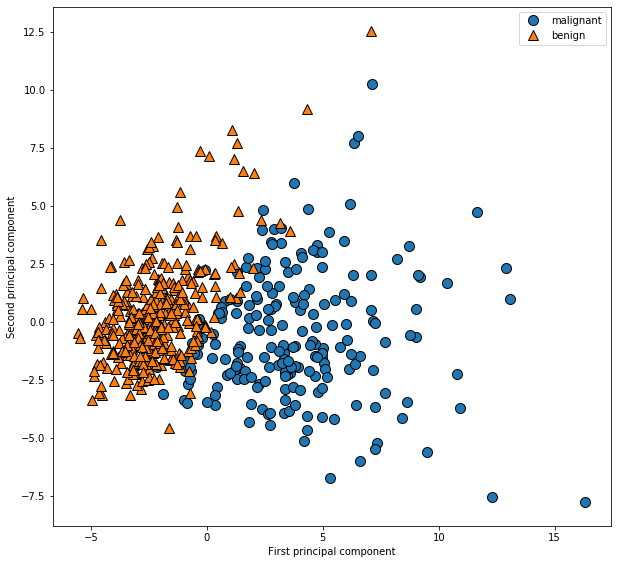

In [4]:
##  plot 1st vs 2nd principal component, colored by class

plt.figure(figsize=(10,10))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.gca().set_aspect("equal")

In [5]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n",pca.components_)

PCA component shape: (2, 30)
PCA components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal component')

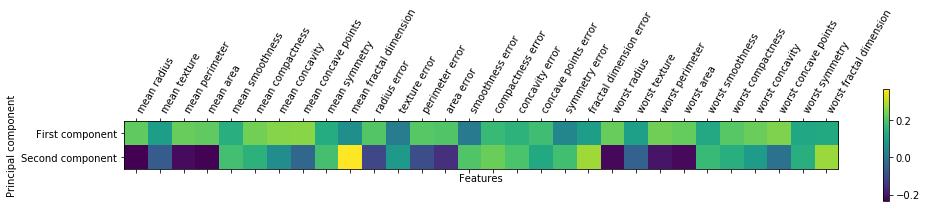

In [6]:
##  visualize the coefficients using heatmap
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1],["First component","Second component"])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha="left")
plt.colorbar()
plt.xlabel("Features")
plt.ylabel("Principal component")

(87, 65)


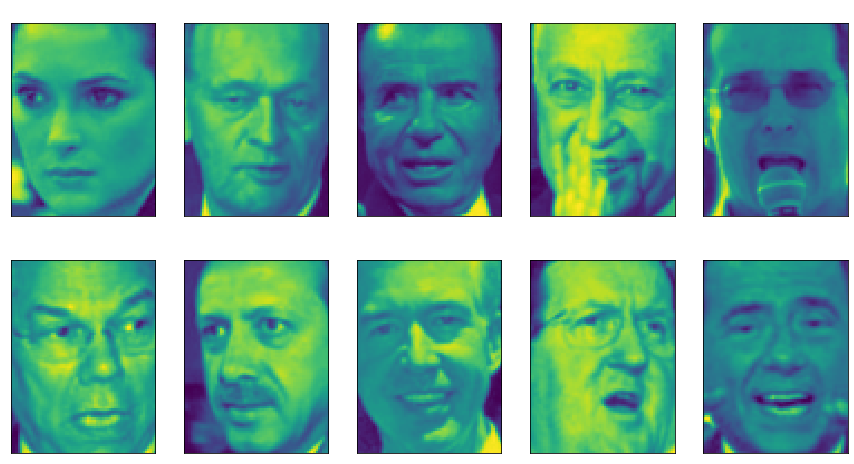

In [7]:
##  feature extraction in PCA
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=.7)
image_shape = people.images[0].shape
print(image_shape)
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={"xticks":(), "yticks":()})
for target,images,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(images)
    ax.set_title(people.target_names[target],color="w")

In [8]:
print(people.images.shape)
print(people.target_names.shape)

##  count how often each target appears
count = np.bincount(people.target)

##  print count next to target names
for i,(count,name) in enumerate(zip(count, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end="\t")
    if (i+1)%3==0:
        print()

(3023, 87, 65)
(62,)
Alejandro Toledo           39	Alvaro Uribe               35	Amelie Mauresmo            21	
Andre Agassi               36	Angelina Jolie             20	Ariel Sharon               77	
Arnold Schwarzenegger      42	Atal Bihari Vajpayee       24	Bill Clinton               29	
Carlos Menem               21	Colin Powell              236	David Beckham              31	
Donald Rumsfeld           121	George Robertson           22	George W Bush             530	
Gerhard Schroeder         109	Gloria Macapagal Arroyo    44	Gray Davis                 26	
Guillermo Coria            30	Hamid Karzai               22	Hans Blix                  39	
Hugo Chavez                71	Igor Ivanov                20	Jack Straw                 28	
Jacques Chirac             52	Jean Chretien              55	Jennifer Aniston           21	
Jennifer Capriati          42	Jennifer Lopez             21	Jeremy Greenstock          24	
Jiang Zemin                20	John Ashcroft              53	John Negr

In [9]:
##  take max 50 images per person

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]=1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [10]:
##  KNNClassifiers on face dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

##  Split the data in test and training set
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,random_state=0 )
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test score accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test score accuracy: 0.28


In [11]:
##  apply PCA object to training data and extract first 100 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True,random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

##  now perform KNN to pca dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

(1547, 100)
Test set accuracy: 0.33


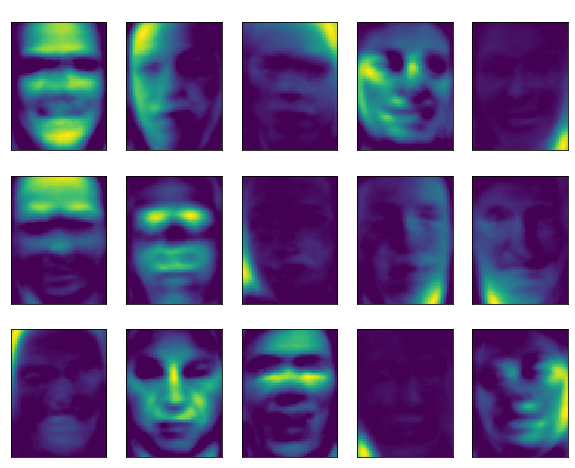

In [12]:
##  applying NMF to face images dataset
from sklearn.decomposition import NMF

nmf = NMF(n_components=15,        random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

##  plot the images
fig, axes = plt.subplots(3, 5, figsize=(10,8), subplot_kw={"xticks":(),"yticks":()})
for i,(component,ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i),color="w")

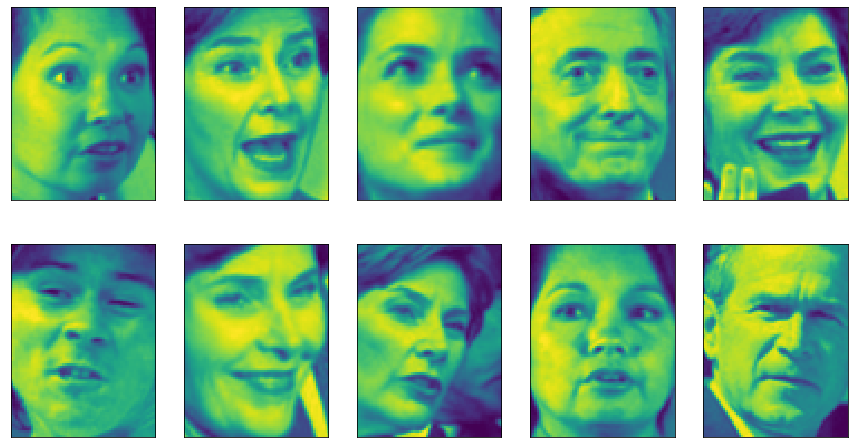

In [13]:
## images for which components are strong

compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

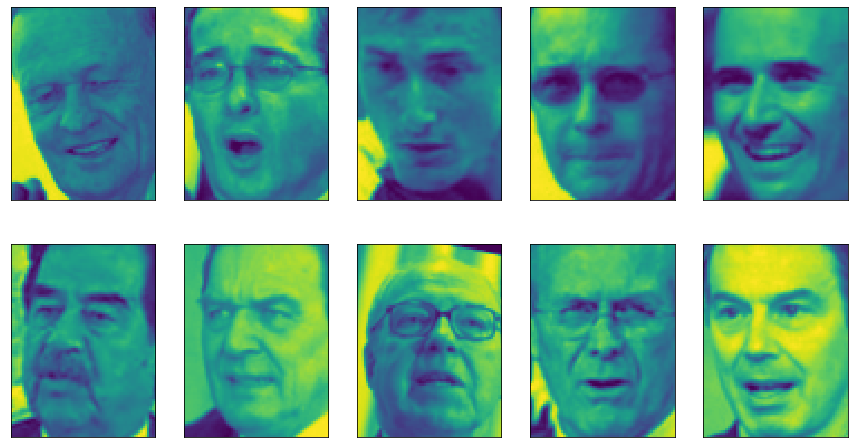

In [14]:
compn = 7
# sort by 7th component, plot the first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks":(), "yticks":()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

((2000, 3), array([[2.65408203, 2.48908887, 1.07757433],
        [2.94981947, 3.45507031, 0.79929765],
        [2.97649958, 3.65235694, 0.73473133],
        ...,
        [2.22337048, 1.33481395, 4.31421863],
        [2.36722058, 1.56522921, 4.53698235],
        [1.77945297, 1.62362822, 0.47660599]]))

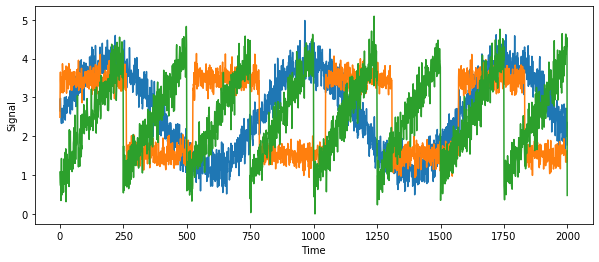

In [15]:
##  dataset of combination of 3 signals

S = mglearn.datasets.make_signals()
plt.figure(figsize=(10,4))
plt.plot(S, "-")
plt.xlabel("Time")
plt.ylabel("Signal")
S.shape, S

Shape of measurements: (2000, 100)
Recovered signal shape: (2000, 3)


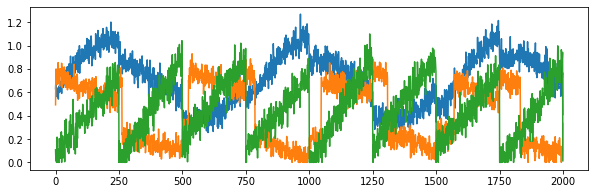

In [16]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

##  use NMF to recover these signals
nmf = NMF(n_components=3, random_state=42)
nmf.fit(X)
S_ = nmf.transform(X)
print("Recovered signal shape: {}".format(S_.shape))

plt.figure(figsize=(10,3))
plt.plot(S_,"-")

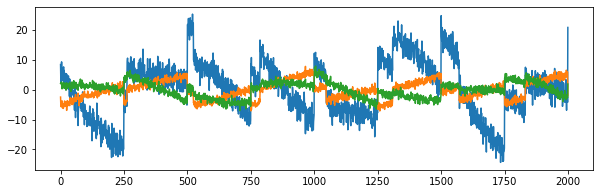

In [17]:
##  applying PCA to the dataset 

pca = PCA(n_components=3)
H = pca.fit_transform(X)
H.shape
plt.figure(figsize=(10,3))
plt.plot(H, "-")

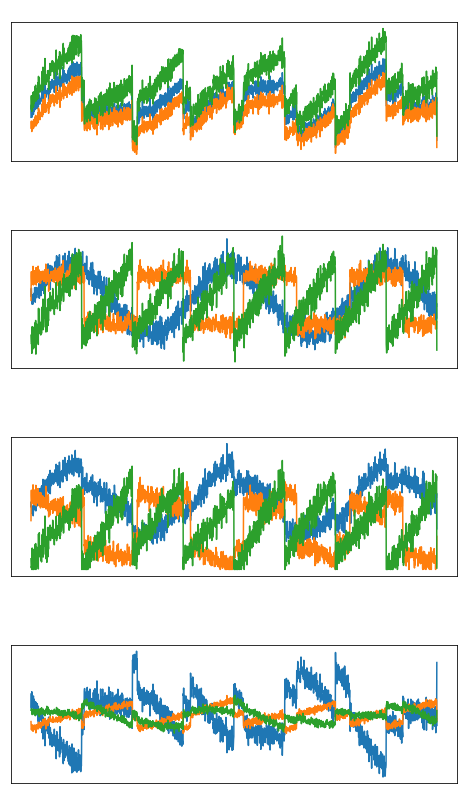

In [18]:
##  plotting all the findings for observation

models = [X, S, S_, H]
names = ['Observations (first three measurements)', 'True sources', 'NMF recovered signals', 'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8,14), gridspec_kw={'hspace': .5},subplot_kw={"xticks":(), "yticks":()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name,color="w")
    ax.plot(model[:, :3],"-")


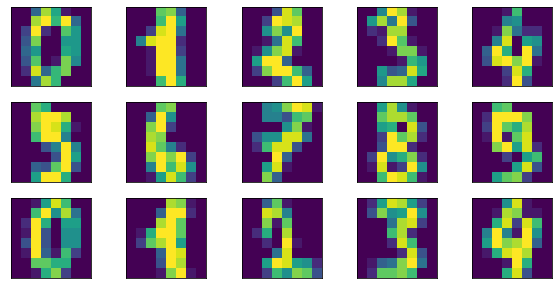

In [19]:
##  t-SNE manifold algorithm on datasets of handwritten digits

from sklearn.datasets import load_digits
digits = load_digits()
#print(digits)
fig, axes = plt.subplots(3, 5, figsize=(10,5), subplot_kw={"xticks":(), "yticks":()})
for digit, ax in zip(digits.images, axes.ravel()):
    ax.imshow(digit)

Text(0, 0.5, 'Second principal component')

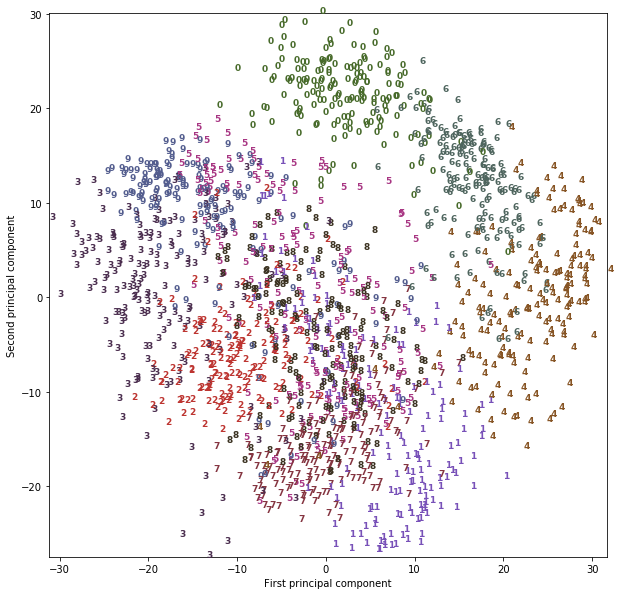

In [20]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0.5, 0, 't-SNE feature 1')

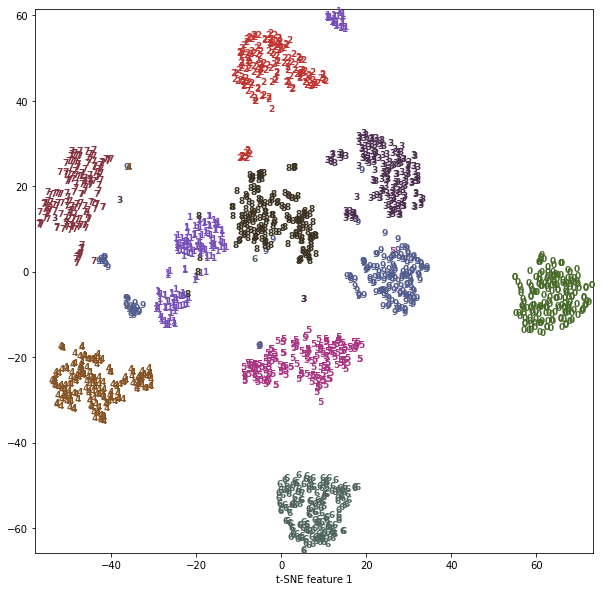

In [21]:
##  t-SNE model 
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")


In [22]:
##  KNN model with Scikit learn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs();
X, X.shape
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print("Cluster membership: \n{}".format(kmeans.labels_))
print(kmeans.predict(X))

Cluster membership: 
[0 1 1 1 1 0 2 1 0 2 0 2 2 1 0 1 0 2 2 0 0 0 1 2 0 0 2 0 1 0 1 2 2 2 0 2 2
 1 1 0 1 0 0 2 2 1 2 0 1 0 1 2 2 2 2 0 0 1 2 0 2 2 2 2 1 0 1 2 1 1 0 1 2 0
 1 2 2 1 0 0 1 1 2 2 2 2 2 0 0 2 2 1 0 1 1 0 0 1 0 0]
[0 1 1 1 1 0 2 1 0 2 0 2 2 1 0 1 0 2 2 0 0 0 1 2 0 0 2 0 1 0 1 2 2 2 0 2 2
 1 1 0 1 0 0 2 2 1 2 0 1 0 1 2 2 2 2 0 0 1 2 0 2 2 2 2 1 0 1 2 1 1 0 1 2 0
 1 2 2 1 0 0 1 1 2 2 2 2 2 0 0 2 2 1 0 1 1 0 0 1 0 0]


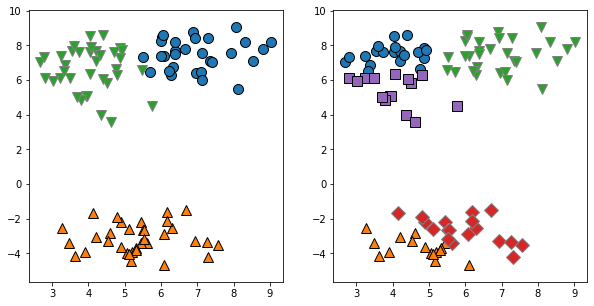

In [23]:
##  plotting different cluster
fig, axes = plt.subplots(1, 2, figsize=(10,5))
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[1])

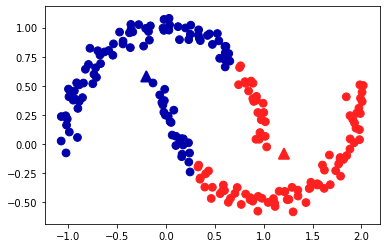

In [24]:
##  KMeans on the 2-moon dataset
##  generate synthetic 2-moons data with less noise
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
X.shape, y.shape

##  cluster the data into 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

##  plt the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="^", c=[mglearn.cm2(0),mglearn.cm2(1)],s=100, linewidth=2)

In [25]:
##  side-by-side comparision of PCA, NMF and KMeans on face datasets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

##  PCA model
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))

##  NMF model
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

##  KMeans model
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]

Text(0, 0.5, 'NMF')

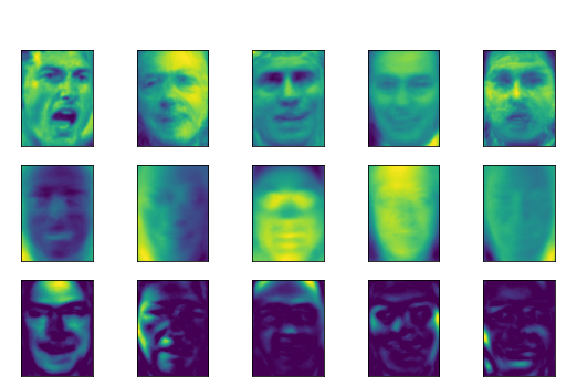

In [26]:
fig, axes = plt.subplots(3, 5, figsize=(10,6), subplot_kw={"xticks":(), "yticks":()})
fig.suptitle("Extracted Components", c="w")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0,0].set_ylabel("KMeans", c="w")
axes[1,0].set_ylabel("PCA", c="w")
axes[2,0].set_ylabel("NMF", c="w")

Text(0, 0.5, 'nmf')

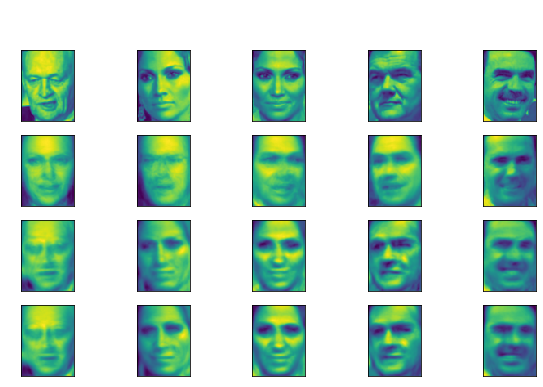

In [27]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 6))
fig.suptitle("Reconstructions",c="w")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("original",c="w")
axes[1, 0].set_ylabel("kmeans",c="w")
axes[2, 0].set_ylabel("pca",c="w")
axes[3, 0].set_ylabel("nmf",c="w")


Text(0, 0.5, 'Feature 1')

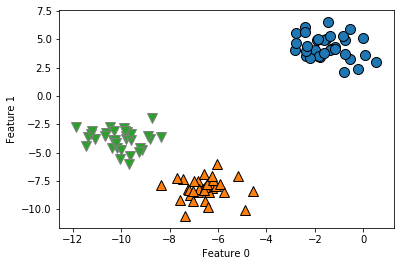

In [28]:
##  Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Cluster distance')

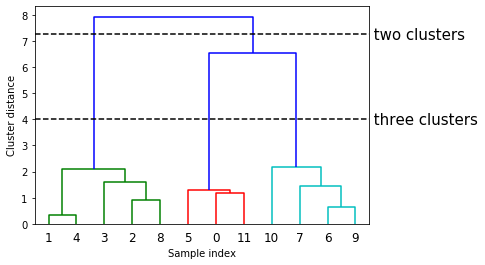

In [29]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Feature 1')

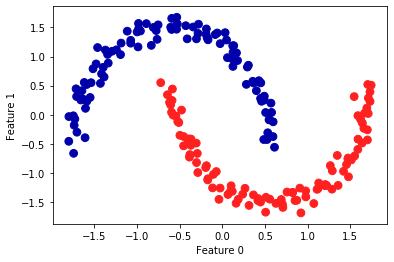

In [35]:
##  DBSCAN on 2-moon datasets
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()    ## default eps=0.5
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

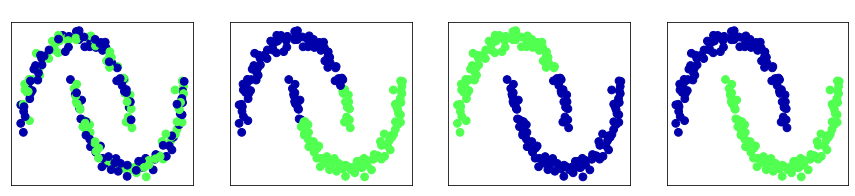

In [40]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format( adjusted_rand_score(y, random_clusters)), c="w")

for ax, algorithm in zip(axes[1:], algorithms):
 # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,    cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)),c="w")